## 5 Decision Tree

In [51]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'
from scipy import stats

In [52]:
# 1) Load data.

X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.
np.random.shuffle(X_and_Y)   # Shuffle the data.
X = X_and_Y[:, 0:-1]         # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, -1]           # Last column: Labels (0 or 1)
print(X.shape, Y.shape)      # Check the shapes.

(351, 34) (351,)


In [53]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(280, 34) (71, 34) (280,) (71,)


In [54]:
# 3) Perform grid search for best D using sklearn

D_list = [1, 2, 3, 4, 5]
parameters = {'max_depth': D}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
clf.fit(X_train_val, Y_train_val)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sc

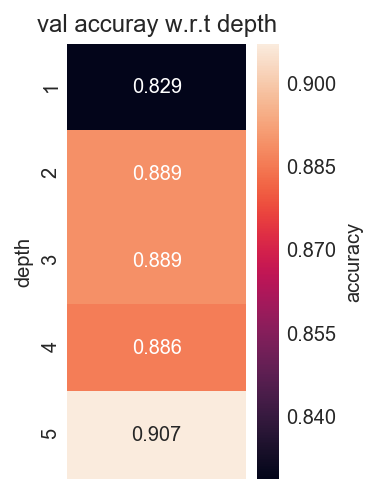

In [55]:
# 4) Draw heatmaps for result of grid search and find 
#    optimal D for validation set.
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
    
#######FILL IN HERE #########
draw_heatmap_linear(clf.cv_results_["mean_test_score"].reshape(5,1), 'val accuray', D_list)

Best D is 2

In [56]:
# 5) Use the optimal D to calculate the test accuracy.
from sklearn.metrics import accuracy_score
d_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
d_tree.fit(X_train_val, Y_train_val)
predictions = d_tree.predict(X_test)

test_acc = accuracy_score(Y_test, predictions)
print(test_acc)

0.9154929577464789


## 6 K-Nearest Neighbors

In [57]:
# 1) Load data.

X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.
np.random.seed(0)
np.random.shuffle(X_and_Y)   # Shuffle the data.
X = X_and_Y[:, 0:-1]         # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, -1]           # Last column: Labels (0 or 1)
print(X.shape, Y.shape)      # Check the shapes.

(351, 34) (351,)


In [58]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(280, 34) (71, 34) (280,) (71,)


In [68]:
# 3) Implement the k-NN.
class simple_KNeighborsClassifier(object):
    def __init__(self, k):
        """
        k-NN initialization.
            k: Number of nearest neighbors.
        """
        self.k = k
        
    def fit(self, X_train, Y_train):
        """
        k-NN fitting function.
            X_train: Feature vectors in training set.
            Y_train: Labels in training set.
        """
        self.X_train = X_train
        self.Y_train = Y_train
        
    def predict(self, X_pred):
        """
        k-NN prediction function.
            X_pred: Feature vectors in training set.
        Return the predicted labels for X_pred. Shape: (len(X_pred), )
        """
        Y_pred = []
        
        #######FILL IN HERE #########
        d_dict = {}
        for x in X_pred:
            for j in range(len(self.X_train)):
                d = 0
                x_p = self.X_train[j]
                for i in range(len(x)):
                    d += (x[i] - x_p[i]) ** 2
                d = d ** 0.5
                d_dict[d] = self.Y_train[j]
                keylist = sorted(d_dict.keys())
                lab_list = []
                count = 0
                avg = 0.0;
                for key in keylist:
                    avg += d_dict[key]
                    count = count + 1
                    if(count == self.k):
                        break
            avg /= self.k
            if (avg >= 0.5):
                Y_pred.append(1)
            else:
                Y_pred.append(0) 
            
            
            '''
            sorted_d = [(k, d[k]) for k in sorted(d, key=d.get, reverse=False)]
            y_list = []
            for i in range(self.k):
                y_list.append(sorted_d[i][1])
            Y_pred.append(stats.mode(y_list))
            '''
        print(Y_pred)  
        return np.array(Y_pred)

In [69]:
# 4) Implement the cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, k, fold):
    """
    A simple cross-validation function for k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k:           Parameter k for k-NN.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    
    
    X_train_val = np.array_split(X_train_val, fold, 0)
    Y_train_val = np.array_split(Y_train_val, fold, 0)
    
    val_acc_list = []
    train_acc_list = []
    for i in range(fold):
        
        #split into train and val sets
        X_train = X_train_val.copy()
        Y_train = Y_train_val.copy()
        X_val = X_train.pop(i)
        Y_val = Y_train.pop(i)
        X_train = np.concatenate(X_train)
        Y_train = np.concatenate(Y_train)
        
        
        # get accuracies
        clf = simple_KNeighborsClassifier(k)
        clf.fit(X_train, Y_train)
        
        train_pred = clf.predict(X_train)
        train_acc = accuracy_score(Y_train, train_pred)
        val_pred = clf.predict(X_val)
        val_acc = accuracy_score(Y_val, val_pred)
        
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [70]:
# 5) Implement the grid search function.

def simple_GridSearchCV_fit(X_train_val, Y_train_val, k_list, fold):
    """
    A simple grid search function for k with cross-validation in k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k_list:      The list of k values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of k are included in the array. 
    Shape: (len(k_list), )
    """
    val_acc_array = np.zeros(len(k_list))
    train_acc_array = np.zeros(len(k_list))
    for i in range(len(k_list)):
        val_acc_array[i], train_acc_array[i] = simple_cross_validation(
            X_train_val, Y_train_val, k_list[i], fold)
    return val_acc_array, train_acc_array

In [71]:
# 6) Perform grid search.

k_list = [1,2,3,4,5,6]
val_acc_array, train_acc_array = simple_GridSearchCV_fit(X_train_val, Y_train_val, k_list, 3)

[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 144x288 with 0 Axes>

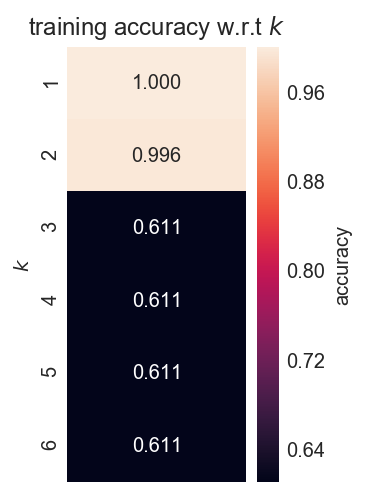

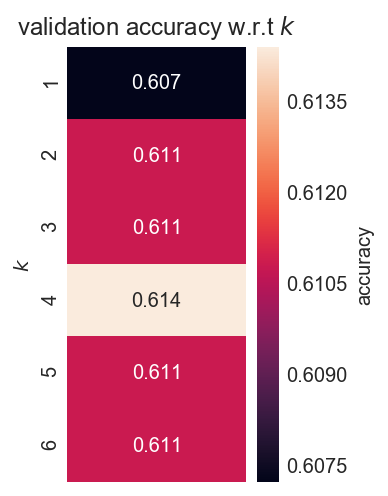

In [73]:
# 7) Draw heatmaps for result of grid search and find 
#    best k on validation set.

def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

#######FILL IN HERE #########

# Hint:
# You can use the draw_heatmap_knn() to draw a heatmap to visualize 
# the accuracy w.r.t. k. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],[0.7]])
# demo_k_list     = [1, 2]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_k_list)
#

draw_heatmap_knn(train_acc_array.reshape(6,1), 'training accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(6,1), 'validation accuracy', k_list)

Best k is 4

In [74]:
# 8) Use the best k to calculate the test accuracy.

#######FILL IN HERE #########
k = 4
knn = simple_KNeighborsClassifier(k)
knn.fit(X_train_val, Y_train_val)
val_pred = clf.predict(X_test)
val_acc = accuracy_score(Y_test, val_pred)
print(val_acc)

0.9859154929577465


## 7 (Bonus) SVM